In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps

# Howdy! This is a markdown cell

It has all the usual markdown properties.

I can do LaTeX in it

$$ \int_0^\infty e^{-t^2}\;dt$$

Today, we are going to learn about sparse matrices

One of the most popular (but by the far not the only one) use of sparse matrices is in the numerical analysis of partial differential equations. We are going to study the 1D version of the Laplace and Poisson equations:

Find $u(x)$ for $x\in (0,1)$ solving

$$ \begin{array}{ll} u''(x) & = f(x) \text{ for } x \in (0,1) \\
u(x) & = g(x) \text{ for } x \in \{0,1\}
\end{array}$$  

In [ ]:
# Create my approximation to (0,1)
# by setting a discrete step size

h = 1e-2
x = np.arange(0,1,h)
print(x)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


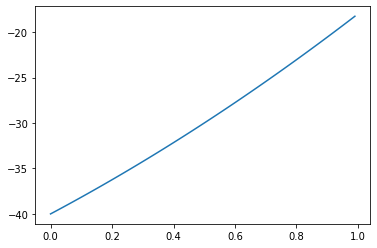

In [ ]:
# x is a numpy array of length 1000, 
# you can generate new arrays by doing algebraic or other functions on x
# as long as they return an array

y = 4*x*x+18*x-40
plt.plot(x,y)

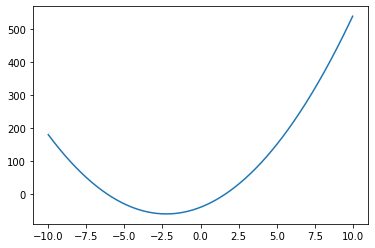

In [ ]:
x = np.arange(-10,10,h)
y = 4*x*x+18*x-40
plt.plot(x,y)

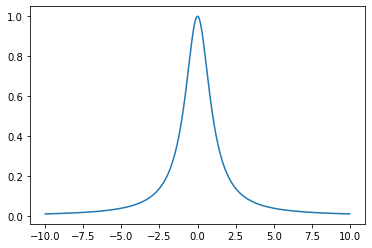

In [ ]:
x = np.arange(-10,10,h)
y = 1/(1+x**2)
plt.plot(x,y)

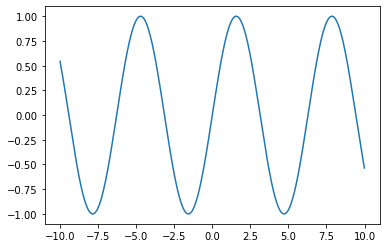

In [ ]:
x = np.arange(-10,10,h)
y = np.sin(x)
plt.plot(x,y)

What we are going to do is to generate a $n\times n$ matrix approximating the second derivative operator $u\mapsto u''$

For this it is convenient to use a new object called a sparse matrix, and these are objects of several kinds brought by the scipy.sparse package

In [ ]:
# The first we are going to study is the "Dictionary of Keys" (DOK)
# sparse matrix object

h = 1e-2
x = np.arange(0,1,h)

A = sps.dok_matrix((len(x),len(x)))

In [ ]:
# A is basically a dictionary

for k in range(1,len(x)-1):
  A[k,k] = -2/(h**2)
  A[k,k+1] = 1/(h**2)
  A[k,k-1] = 1/(h**2)


In [ ]:
M = A.todense()

In [ ]:
type(M)

numpy.matrix

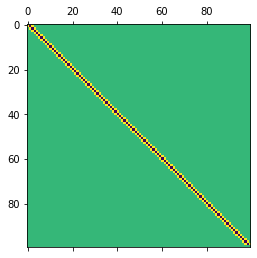

In [ ]:
plt.matshow(M)